<h1><center>Atividade AB2 - Processamento digital de sinais</h1>

<h3>Derek Nielsen Araújo Alves</h2>
<h3>Walmer Almeida Cavalcante</h2>
<h3>Professor: Thiago Damasceno Cordeiro</h2>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lp2hp.html#scipy.signal.lp2hp

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html


In [ ]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.signal as signal
import scipy
import control
from control import matlab as mlb
import warnings
warnings.filterwarnings('ignore')

#**Funções Gerais**

In [ ]:
# Plota o diagrama de magnitude em magnitude e em dB, destacando as frequências de passagem e de parada para filtros no tempo contínuo ou discreto
def plot_bode(w, mag, cutoff, w_pass, w_stop, filter_name, analog=True):

  theta = np.arange(0, np.pi, step=(0.2*np.pi))
  plt.figure(figsize=(18, 14), facecolor='silver')
  plt.subplot(2, 1, 1)

  title = "Bode para o filtro " + filter_name + " contínuo"
  xlabel = "Frequência em radianos ($\Omega$)"
  if not analog:
    title = "Bode para o filtro " + filter_name + " discreto"
    xlabel = "Frequência em radianos ($\omega$)"
    plt.xticks(theta, ['0π', '0.2π', '0.4π', '0.6π', '0.8π', 'π'])
  
  plt.plot(w, control.db2mag(mag)) # Bode filter plot
  plt.axvline(cutoff, color='green', label="cutoff: " + str(round(cutoff, 2))) # cutoff frequency
  plt.axvline(w_pass, color='red', label="w_pass: " + str(round(w_pass, 2))) 
  plt.axvline(w_stop, color='orange', label="w_stop: " + str(round(w_stop, 2))) 
  plt.title(title)
  plt.legend()
  plt.ylabel("Amplitude")
  plt.xlabel(xlabel)  
  plt.grid()

  plt.subplot(2, 1, 2)
  if not analog:
    plt.xticks(theta, ['0π', '0.2π', '0.4π', '0.6π', '0.8π', 'π'])
  plt.plot(w, mag)
  plt.axvline(cutoff, color='green', label="cutoff: " + str(round(cutoff, 2))) # cutoff frequency
  plt.axvline(w_pass, color='red', label="w_pass: " + str(round(w_pass, 2))) 
  plt.axvline(w_stop, color='orange', label="w_stop: " + str(round(w_stop, 2))) 
  plt.title(title)
  plt.legend()
  plt.ylabel("Amplitude[dB]")
  plt.xlabel(xlabel)  
  plt.grid()
  plt.show()

In [ ]:
# Plotagem do sinal, permitindo a plotagem de 2 sinais
def plot_sig(x, y, xd, yd, title, double_graph=True, chebyshev=False):

  plt.figure(figsize=(18, 7), facecolor='silver')
  if double_graph:
    plt.figure(figsize=(18, 14), facecolor='silver')
    plt.subplot(2, 1, 1)
  plt.plot(x, y)
  plt.xlabel("Tempo[s]")
  plt.ylabel("Amplitude")
  plt.title(title)
  plt.grid()

  if double_graph:
    plt.subplot(2, 1, 2)
    plt.plot(xd, yd)
    plt.xlabel("Tempo[s]")
    plt.ylabel("Amplitude")
    plt.title("Sinal filtrado pelo filtro discreto")
    if chebyshev:
      plt.title("Sinal filtrado pelo filtro discreto passa alta")
    plt.grid()
  plt.show()

#**1º Questão**

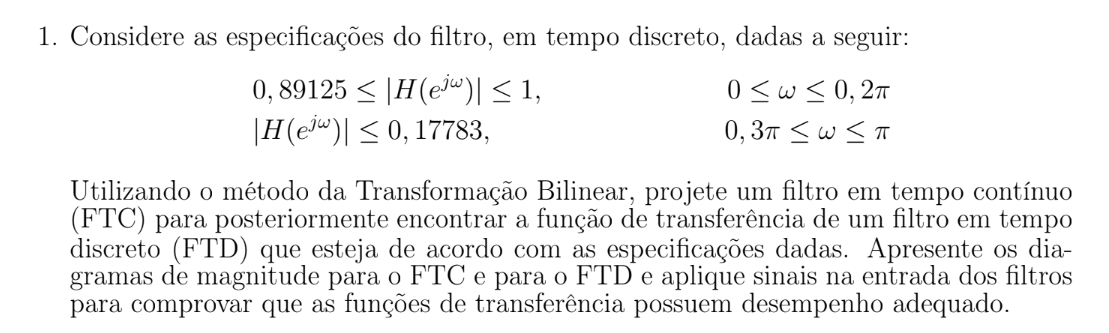

In [ ]:
# funções para conversão da frequência de discreto para contínuo e vice versa
def d2analog_freq(w, dt):
    return (2/dt)*np.tan(w/2)

def analog2d_freq(Omega, dt):
    return 2*np.arctan(Omega*dt/2)

In [ ]:
g_pass = 0.89125    # Atenuação máxima para a banda de passagem
g_stop = 0.17783    # Atenuação mínima para a banda de corte
w_pass = 0.2*np.pi  # Banda de passagem
w_stop = 0.3*np.pi  # Banda de corte

# Convertendo para dB
g_pass_dB = control.mag2db(g_pass) 
g_stop_dB = control.mag2db(g_stop)

#print(abs(g_pass_dB), abs(g_stop_dB))

# Convertendo omega do discreto para contínuo
dt = 1
w_pass_analog = d2analog_freq(w_pass, dt)
w_stop_analog = d2analog_freq(w_stop, dt)

#print(w_pass_analog, w_stop_analog)

# Obtem a ordem e frequência de corte para criação do filtro butterworth
N, Wn = signal.buttord(w_pass_analog, w_stop_analog, abs(g_pass_dB), abs(g_stop_dB), analog=True)
print("N: ", N, "\nWc: ", Wn)
# Cria o filtro a partir da ordem e da frequência de corte
num, den = signal.butter(N, Wn, btype='lowpass', analog=True)
Gs = mlb.tf(num, den)
print("Gs: ")
Gs

N:  6 
Wc:  0.7272902644630906
Gs: 


TransferFunction(array([0.14799486]), array([1.        , 2.8100338 , 3.94814497, 3.51679048, 2.08837574,
       0.78621738, 0.14799486]))

**Plotando diagramas de magnitude do filtro contínuo:**

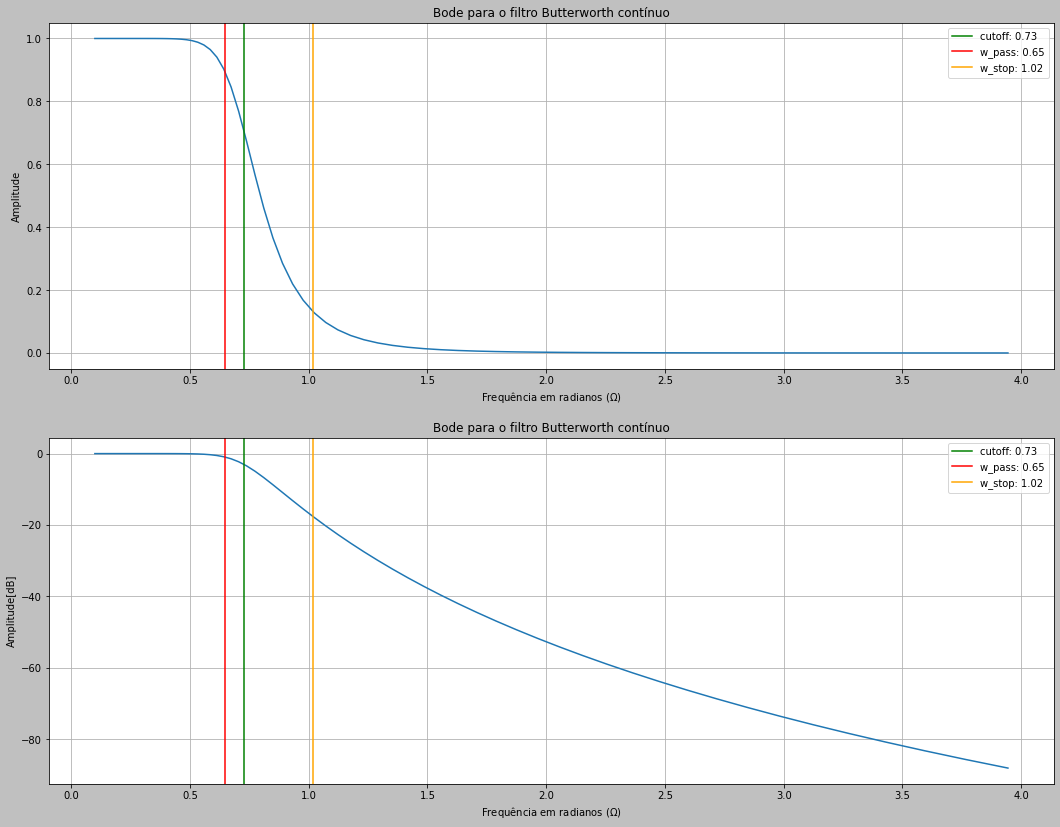

In [ ]:
w, mag, _ = signal.bode((np.squeeze(Gs.num), np.squeeze(Gs.den)))
plot_bode(w[:80], mag[:80], Wn, w_pass_analog, w_stop_analog, "Butterworth", analog=True)

**Adquirindo a função de transferência do filtro em tempo discreto:**

In [ ]:
Gz = mlb.c2d(Gs, dt, 'bilinear') # Convertendo o filtro contínuo para discreto
print("Gz:")
Gz

Gz:


TransferFunction(array([0.00057969, 0.00347814, 0.00869536, 0.01159382, 0.00869536,
       0.00347814, 0.00057969]), array([ 1.        , -3.31430234,  4.95010735, -4.14325991,  2.02754479,
       -0.54583339,  0.06284371]), 1)

**Plotando diagramas de magnitude do filtro discreto:**

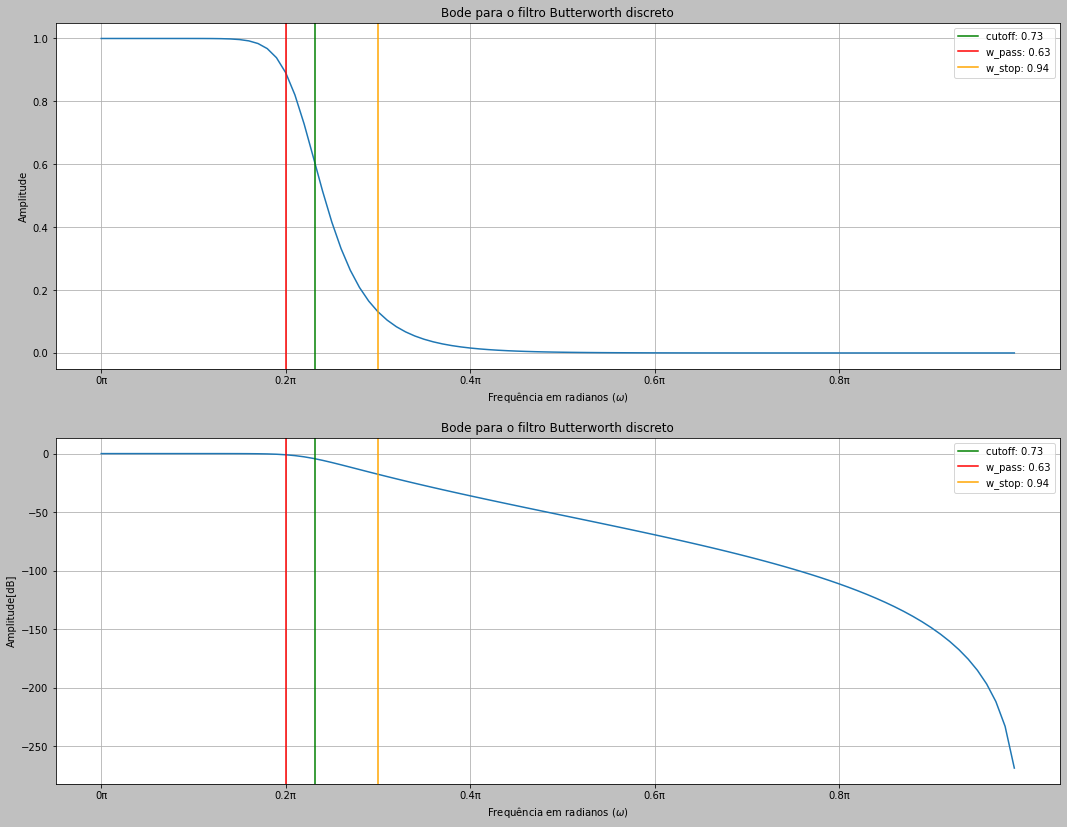

In [ ]:
w, mag, _ = signal.dbode((np.squeeze(Gz.num), np.squeeze(Gz.den), Gz.dt))
plot_bode(w*dt, mag, Wn*dt, w_pass, w_stop, "Butterworth", analog=False)

**Criando os sinais para testar:**

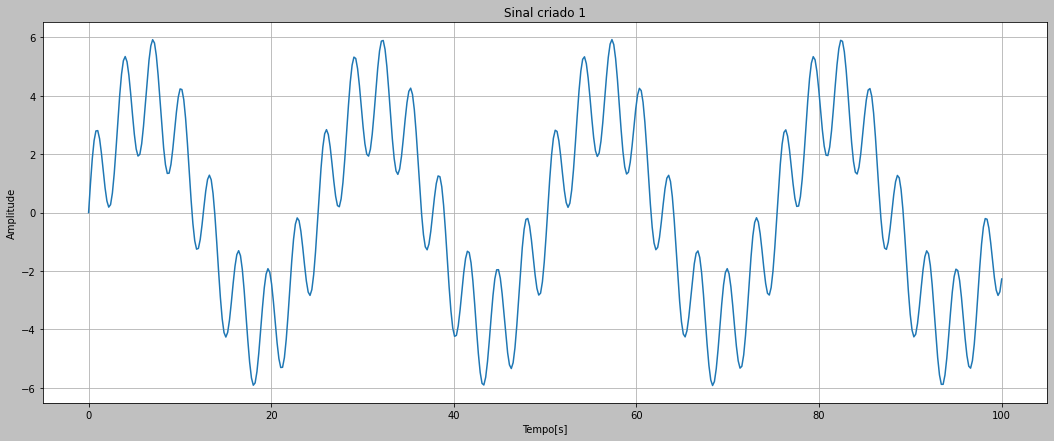

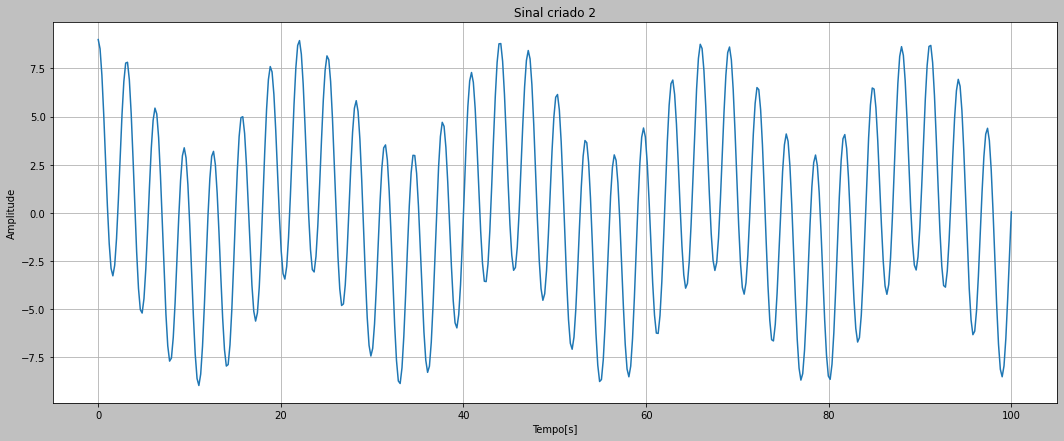

In [ ]:
# Criando um sinal para testar
t = np.linspace(0, 100, 500) # 100s

sig = 4*np.sin(0.25*t) + 2*np.sin(2*t) # sinal composto de senos com frequência angular(omega) = 0.25 rad e frequência angular(omega) = 2 rad
sig2 = 3*np.cos(0.28*t) + 6*np.cos(2*t)
plot_sig(t, sig, 0, 0, "Sinal criado 1", double_graph=False)
plot_sig(t, sig2, 0, 0, "Sinal criado 2", double_graph=False)

**Aplicando os filtros em tempo contínuo e discreto nos sinais criados:**

<Figure size 1296x504 with 0 Axes>

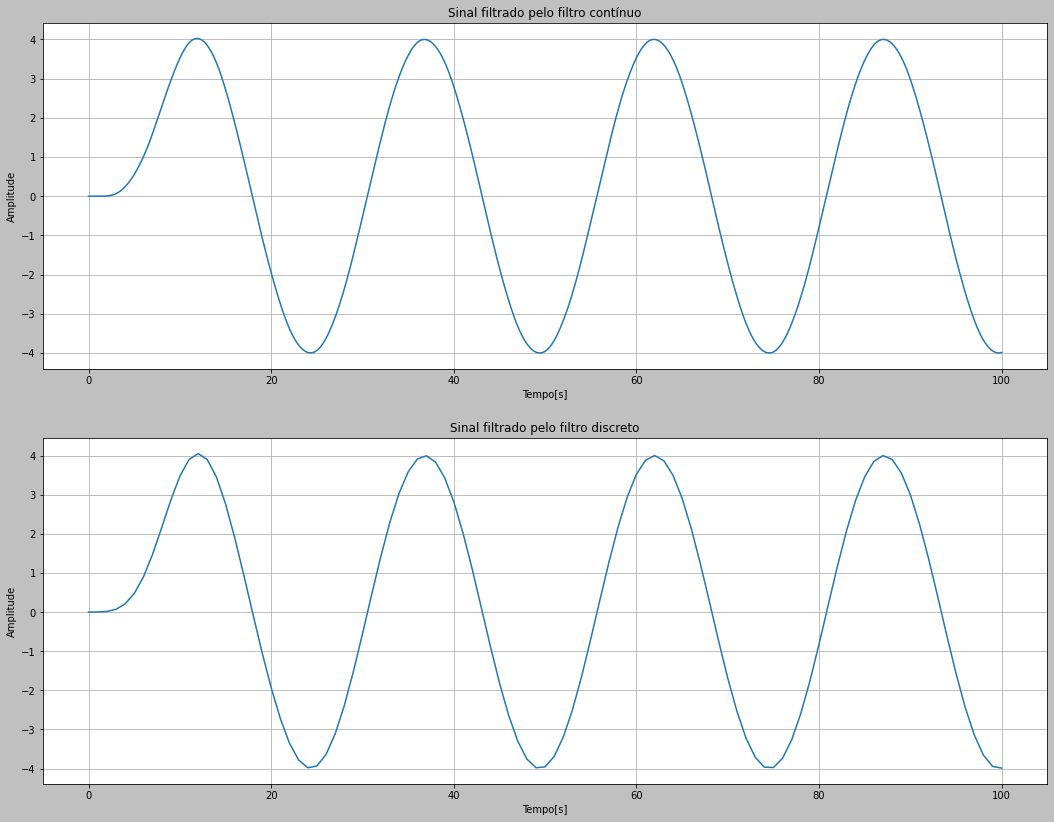

<Figure size 1296x504 with 0 Axes>

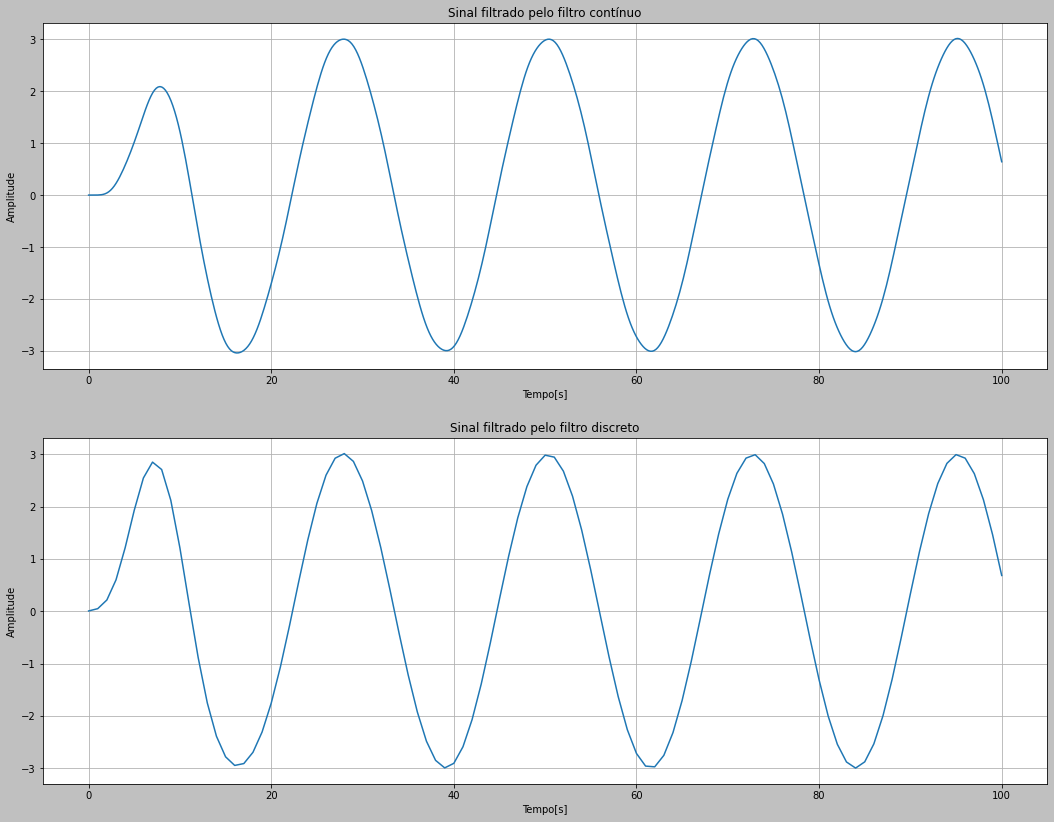

In [ ]:
_, y, _ = signal.lsim((np.squeeze(Gs.num), np.squeeze(Gs.den)), sig, T=t)
xd, yd = signal.dlsim((np.squeeze(Gz.num), np.squeeze(Gz.den), Gz.dt), sig, t=t)
plot_sig(t, y, xd, yd, "Sinal filtrado pelo filtro contínuo", double_graph=True)

_, y, _ = signal.lsim((np.squeeze(Gs.num), np.squeeze(Gs.den)), sig2, T=t)
xd, yd = signal.dlsim((np.squeeze(Gz.num), np.squeeze(Gz.den), Gz.dt), sig2, t=t)
plot_sig(t, y, xd, yd, "Sinal filtrado pelo filtro contínuo", double_graph=True)

#**2º Questão**

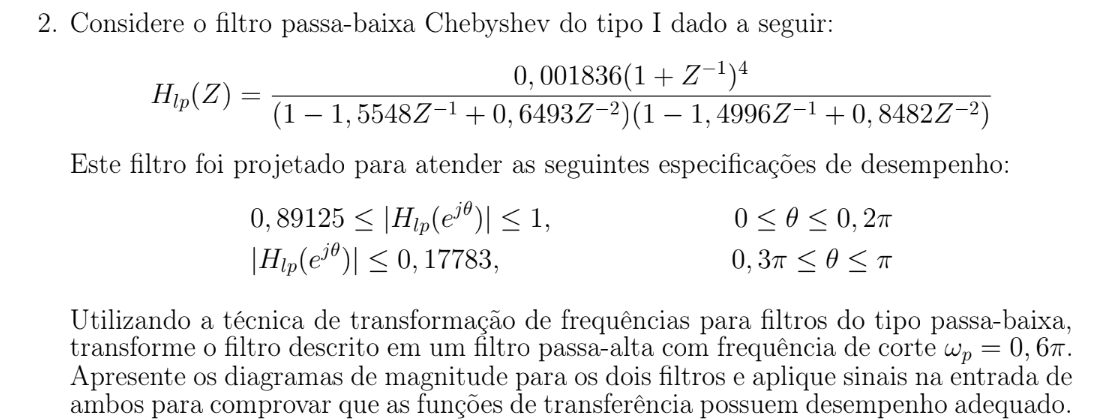

In [ ]:
# Plotagem dos diagramas de magnitude em magnitude e em dB do filtro passa-baixa e passa-alta, destacando a frequência de passagem de cada um
def plot_bode2(wl, magl, wplow, wh, magh, wphigh):

  xlabel = "Frequência em radianos ($\omega$)"
  theta = np.arange(0, np.pi, step=(0.2*np.pi))

  plt.figure(figsize=(18, 14), facecolor='silver')
  
  plt.subplot(2, 1, 1)
  plt.title("Bode para os filtros passa baixa e passa alta")
  plt.xticks(theta, ['0π', '0.2π', '0.4π', '0.6π', '0.8π', 'π'])
  plt.plot(w1, control.db2mag(mag1), label="Passa baixa")
  plt.plot(w2, control.db2mag(mag2), label="Passa alta")
  plt.axvline(wphigh, color='green', label="Corte passa baixas") # LP freq cutoff
  plt.axvline(wplow, color='orange', label="Corte passa altas") # HP freq cutoff
  plt.ylabel("Amplitude")
  plt.xlabel(xlabel)
  plt.grid()
  plt.legend()

  plt.subplot(2, 1, 2)
  plt.title("Bode para os filtros passa baixa e passa alta")
  plt.xticks(theta, ['0π', '0.2π', '0.4π', '0.6π', '0.8π', 'π'])
  plt.plot(w1, mag1, label="Passa baixa")
  plt.plot(w2, mag2, label="Passa alta")
  plt.axvline(wphigh, color='green', label="Corte passa baixas") # LP freq cutoff
  plt.axvline(wplow, color='orange', label="Corte passa altas") # HP freq cutoff
  plt.ylabel("Amplitude[dB]")
  plt.xlabel(xlabel)
  plt.grid()
  plt.legend()

  plt.show()

In [ ]:
# Retorna a função de transferência a partir do parâmetro "z" dado
def given_LowpassFilter(z):
  return (0.001836*(1 + z)**4)/((1 - 1.5548*z + 0.6493*z**2)*(1 - 1.4996*z + 0.8482*z**2)) # Função de transferência dada

Filtro passa baixa: 
 
0.001836 z^10 + 0.007344 z^9 + 0.01102 z^8 + 0.007344 z^7 + 0.001836 z^6
------------------------------------------------------------------------
         z^10 - 3.054 z^9 + 3.829 z^8 - 2.292 z^7 + 0.5507 z^6

alfa:  -0.38196601125010515
Filtro passa alta: 
 
 0.006697 z^20 - 0.04213 z^19 + 0.1162 z^18 - 0.185 z^17 + 0.188 z^16 - 0.1276 z^15 + 0.05867 z^14 - 0.01806 z^13 + 0.00357 z^12 - 0.0004099 z^11 + 2.08e-05 z^10
------------------------------------------------------------------------------------------------------------------------------------------------------------------
0.2759 z^20 - 0.1915 z^19 + 0.07519 z^18 - 0.1653 z^17 + 0.0908 z^16 + 0.01196 z^15 + 0.005066 z^14 - 0.02679 z^13 + 0.01485 z^12 - 0.003263 z^11 + 0.0002634 z^10



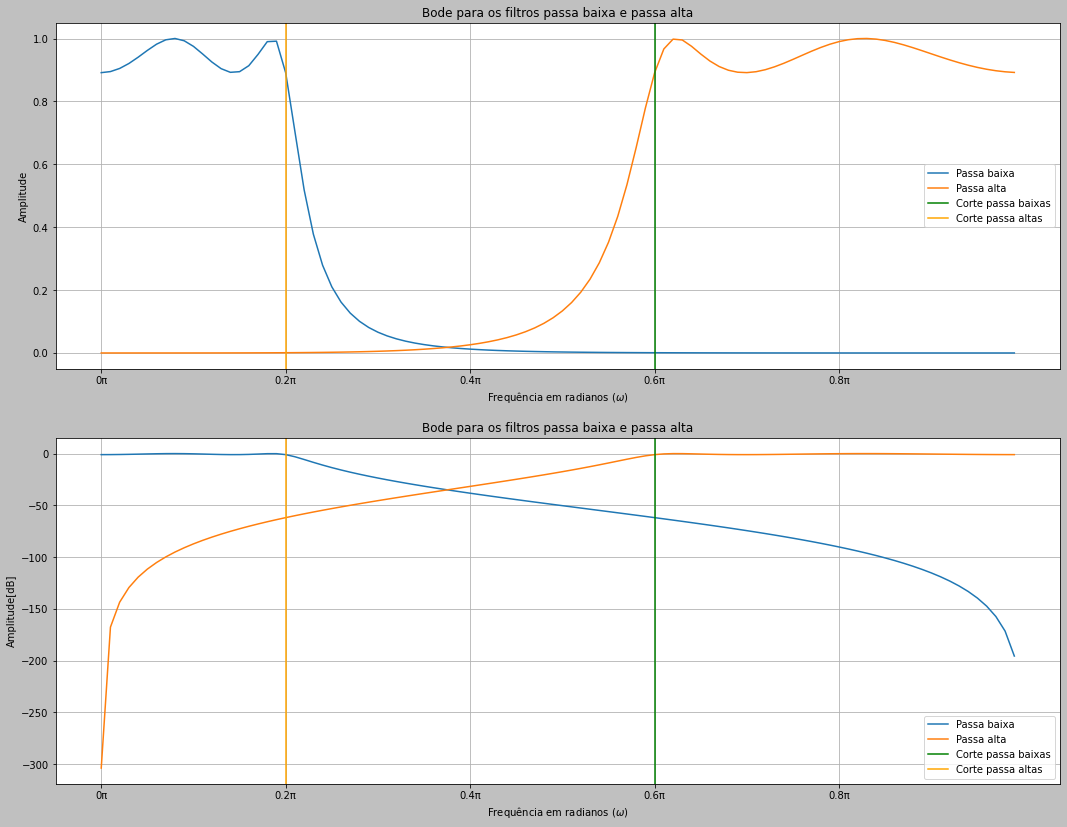

In [ ]:
z = mlb.tf('z')
#Hlp = (0.001836*(1 + z**-1)**4)/((1 - 1.5548*z**-1 + 0.6493*z**-2)*(1 - 1.4996*z**-1 + 0.8482*z**-2))
Hlp = given_LowpassFilter(1/z)
print("Filtro passa baixa: \n", Hlp)

# Transformando em um filtro passa-alta com frequência de corte w_p = 0.6pi
theta_p = 0.2*np.pi # frequência de corte atual
w_p = 0.6*np.pi # frequência de corte do novo filtro

alfa = -np.cos((theta_p + w_p)/2)/np.cos((theta_p - w_p)/2) # valor tabelado para converter filtro passa-baixa para passa-alta
print("alfa: ", alfa)

# Usando a técnica de transformação de frequências para filtros do tipo passa-baixa, temos que para transformar em um filtro passa-alta
# substituímos Z**-1 = -(z**-1 + alfa)/(1 + alfa*z**-1)

zi = -(z**-1 + alfa)/(1 + alfa*z**-1)
# Passando o valor de zi e transformando o filtro em passa alta
#Hhp = (0.001836*(1 + zi)**4)/((1 - 1.5548*zi + 0.6493*zi**2)*(1 - 1.4996*zi + 0.8482*zi**2))
Hhp = given_LowpassFilter(zi)
print("Filtro passa alta: \n", Hhp)


# Plotando os diagramas de Magnitude adquiridos por signal.dbode dos filtros passa-baixa e passa-alta
w1, mag1, _ = signal.dbode((np.squeeze(Hlp.num), np.squeeze(Hlp.den), 1))
w2, mag2, _ = signal.dbode((np.squeeze(Hhp.num), np.squeeze(Hhp.den), 1))

plot_bode2(w1, mag1, theta_p, w2, mag2, w_p)

**Criando os sinais para testar:**

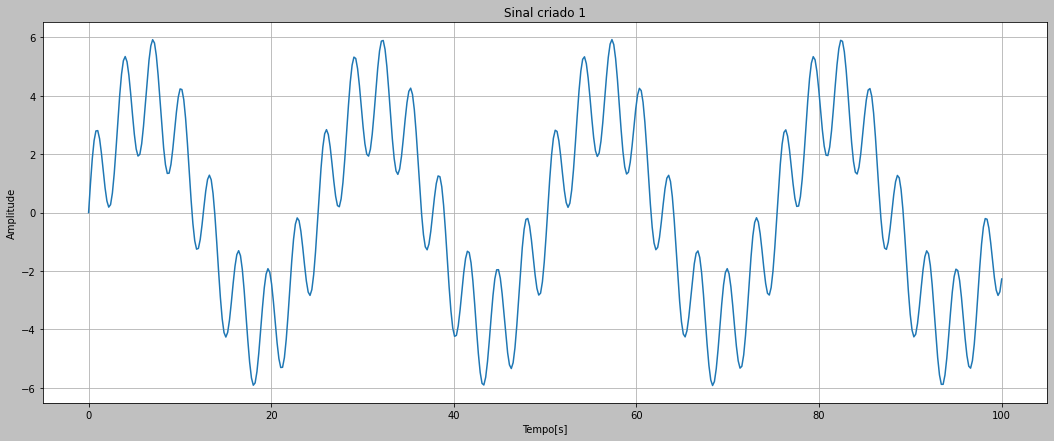

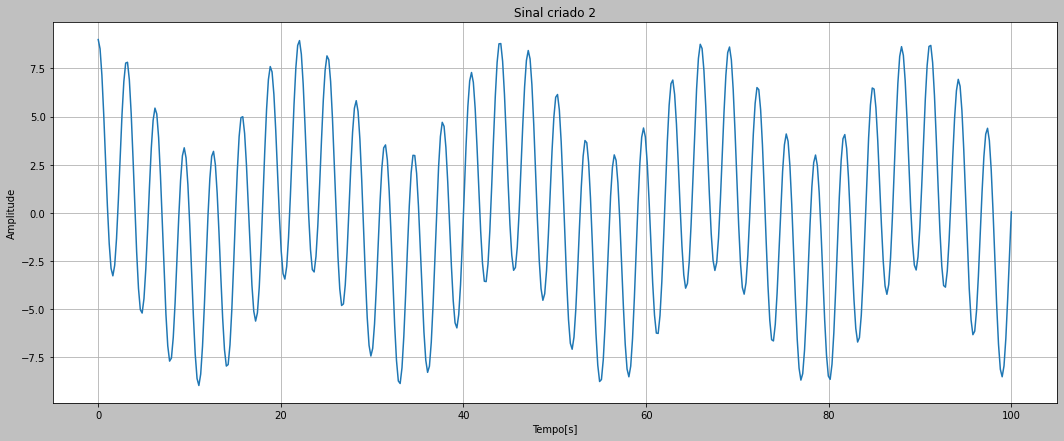

In [ ]:
# Criando um sinal para testar
t = np.linspace(0, 100, 500) # 100s

sig = 4*np.sin(0.25*t) + 2*np.sin(2*t) # sinal composto de senos com frequência angular(omega) = 0.25 rad e frequência angular(omega) = 2 rad
sig2 = 3*np.cos(0.28*t) + 6*np.cos(2*t)
plot_sig(t, sig, 0, 0, "Sinal criado 1", double_graph=False)
plot_sig(t, sig2, 0, 0, "Sinal criado 2", double_graph=False)

**Aplicando os filtros passa-baixa e passa-alta nos sinais criados:**

<Figure size 1296x504 with 0 Axes>

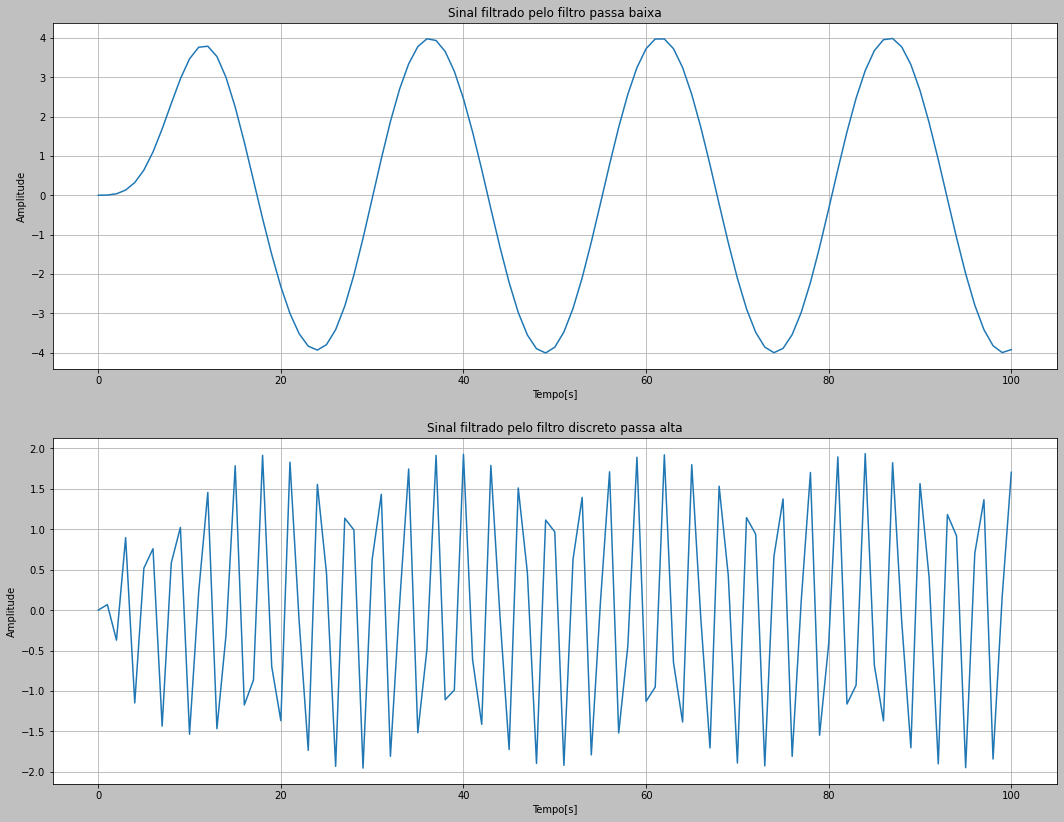

<Figure size 1296x504 with 0 Axes>

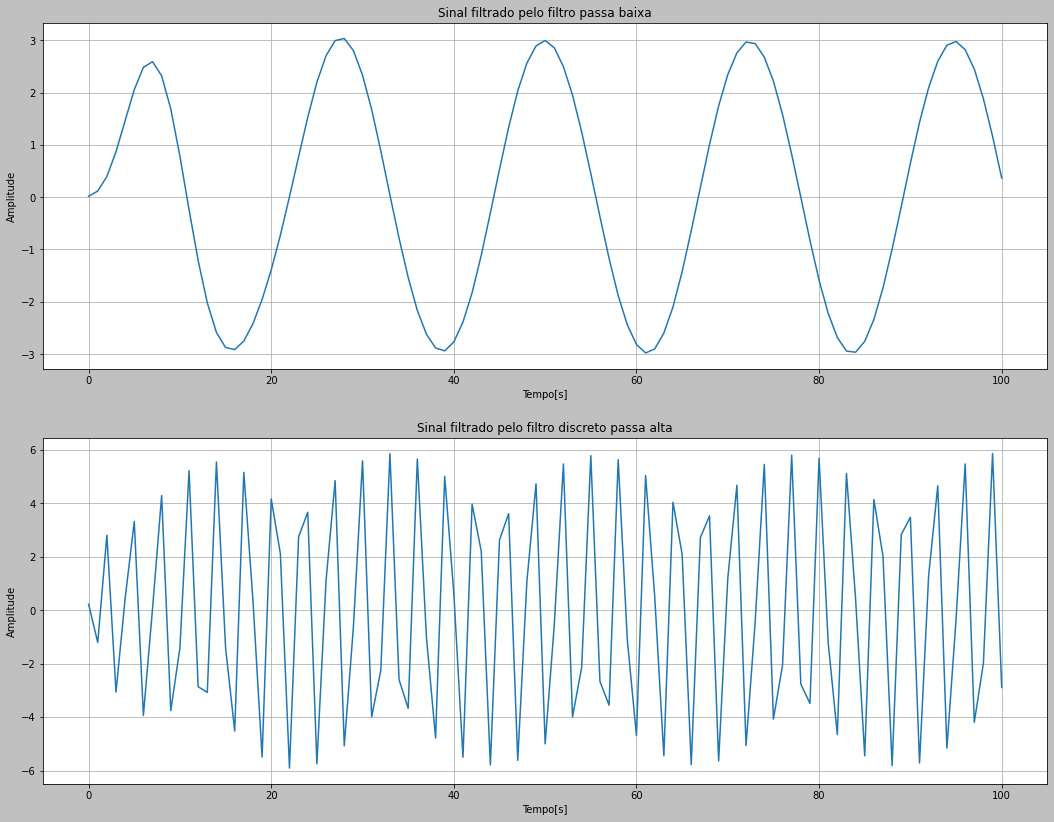

In [ ]:
x, y = signal.dlsim((np.squeeze(Hlp.num), np.squeeze(Hlp.den), 1), sig, t=t)
x2, y2 = signal.dlsim((np.squeeze(Hhp.num), np.squeeze(Hhp.den), 1), sig, t=t)
plot_sig(x, y, x2, y2, "Sinal filtrado pelo filtro passa baixa", double_graph=True, chebyshev=True)

x, y = signal.dlsim((np.squeeze(Hlp.num), np.squeeze(Hlp.den), 1), sig2, t=t)
x2, y2 = signal.dlsim((np.squeeze(Hhp.num), np.squeeze(Hhp.den), 1), sig2, t=t)
plot_sig(x, y, x2, y2, "Sinal filtrado pelo filtro passa baixa", double_graph=True, chebyshev=True)

#**3º Questão**

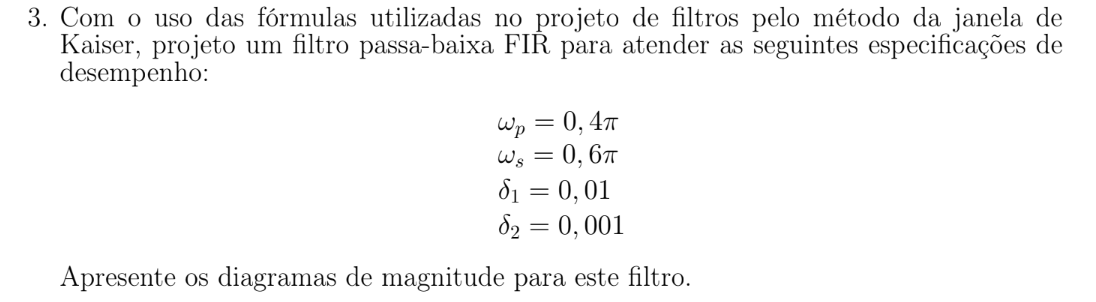

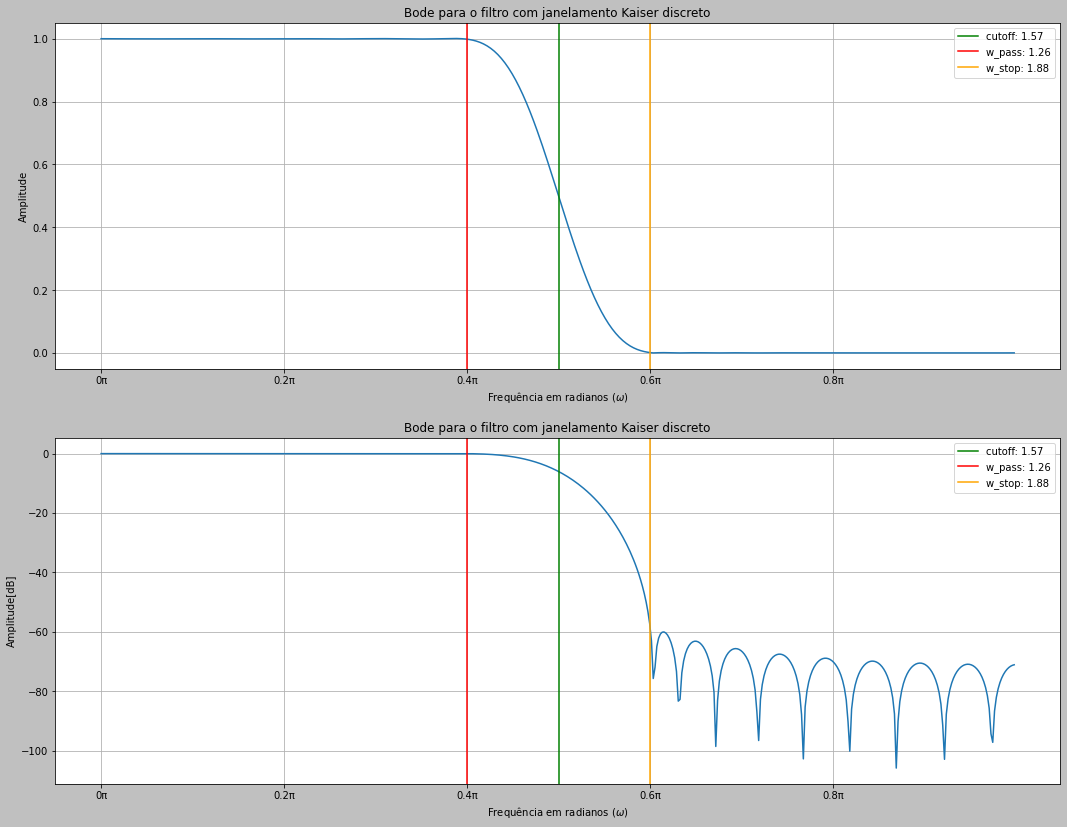

In [ ]:
# Especificações de desempenho
w_p = 0.4*np.pi
w_s = 0.6*np.pi
d_1 = 0.01
d_2 = 0.001

# Como d_1 deve ser igual a d_2, definimos d = d_2
d = d_2

# Definindo a frequência de corte
w_c = (w_p + w_s)/2

# Determinando os parâmetros da janela de Kaiser
d_w = w_s - w_p

A = -20*np.log10(d)

M = np.ceil((A - 8)/(2.285*d_w)) # número de coeficientes

if A > 50:
  beta = 0.1102*(A - 8.7)
elif (21 <= A and A <= 50):
  beta = 0.5842*(A - 21)**0.4 + 0.07886*(A - 21)
elif A < 21:
  beta = 0.0

# Usamos o signal.firwin para calcular a resposta ao impulso do filtro
a1 = signal.firwin(M, cutoff = w_c/np.pi, window = ("kaiser", beta))
w1, h1 = signal.freqz(a1,1)
h_dB = control.mag2db(abs(h1))

# Plotando filtro discreto
plot_bode(w1, h_dB, w_c, w_p, w_s, "com janelamento Kaiser", analog=False)